In [3]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import talib

In [4]:
df = pd.read_csv('../../data/yinance/NVDA.csv')
df.head()
df.describe()

,Close,High,Low,Open,Volume
count,3774.000000,3774.000000,3774.000000,3774.000000,3.774000e+03
mean,6.796822,6.915713,6.666721,6.793541,5.230753e+08
std,10.659754,10.843532,10.461388,10.659140,3.205760e+08
min,0.165269,0.171228,0.162289,0.165269,4.564400e+07
25%,0.357397,0.362422,0.351743,0.357017,3.188510e+08
50%,1.167304,1.176017,1.157976,1.166935,4.495585e+08
75%,7.018725,7.091671,6.849259,6.939958,6.419770e+08
max,50.379307,50.518225,49.387239,50.182284,3.692928e+09


In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3774 non-null   object 
 1   Close   3774 non-null   float64
 2   High    3774 non-null   float64
 3   Low     3774 non-null   float64
 4   Open    3774 non-null   float64
 5   Volume  3774 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 177.0+ KB


Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

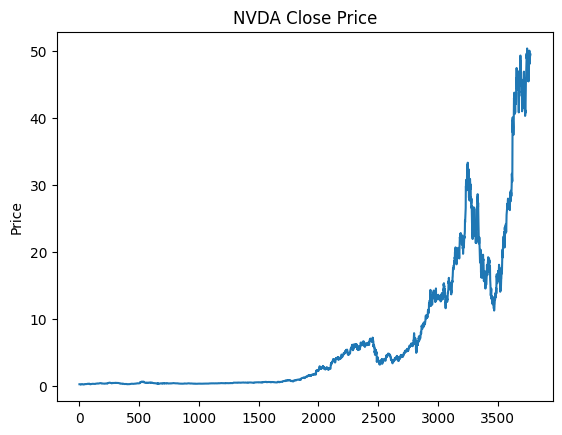

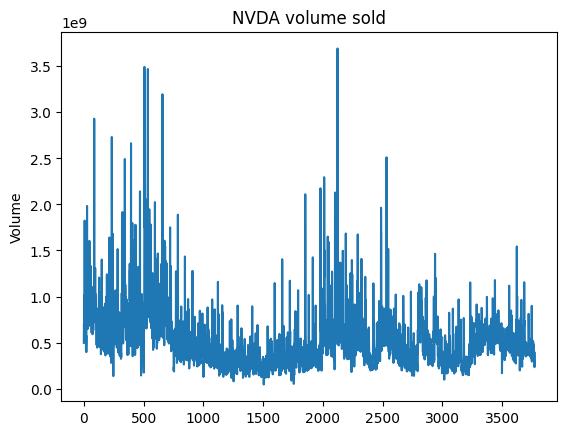

In [6]:
df['Close'].plot(title="NVDA Close Price")
plt.ylabel("Price")
plt.show()

df['Volume'].plot(title="NVDA volume sold")
plt.ylabel("Volume")
plt.show()

In [7]:
price= df["Close"]
df["SMA_20"] = talib.SMA(price, timeperiod=20)
df["SMA_50"] = talib.SMA(price, timeperiod=50)
df["EMA_20"] = talib.EMA(price, timeperiod=20)

df["RSI_14"] = talib.RSI(price, timeperiod=14)

df["MACD"], df["MACD_signal"], df["MACD_hist"] = talib.MACD(
    price, 
    fastperiod=12, 
    slowperiod=26, 
    signalperiod=9
)

df.tail()

,Date,Close,High,Low,Open,Volume,SMA_20,SMA_50,EMA_20,RSI_14,MACD,MACD_signal,MACD_hist
3769,2023-12-22,48.805527,49.358247,48.442706,49.170342,252507000,47.706983,46.257777,48.024644,55.352119,0.634352,0.564438,0.069914
3770,2023-12-26,49.254299,49.575137,48.935459,48.943454,244200000,47.759019,46.334178,48.141754,57.245971,0.655689,0.582688,0.073001
3771,2023-12-27,49.392231,49.655100,49.060397,49.486186,233648000,47.838989,46.400666,48.260847,57.837928,0.675937,0.601338,0.074599
3772,2023-12-28,49.497185,49.859003,49.387239,49.618126,246587000,47.908266,46.512367,48.378593,58.310919,0.692470,0.619564,0.072906
3773,2023-12-29,49.497185,49.971949,48.726571,49.788039,389293000,48.046003,46.658888,48.485126,58.310919,0.697532,0.635158,0.062374


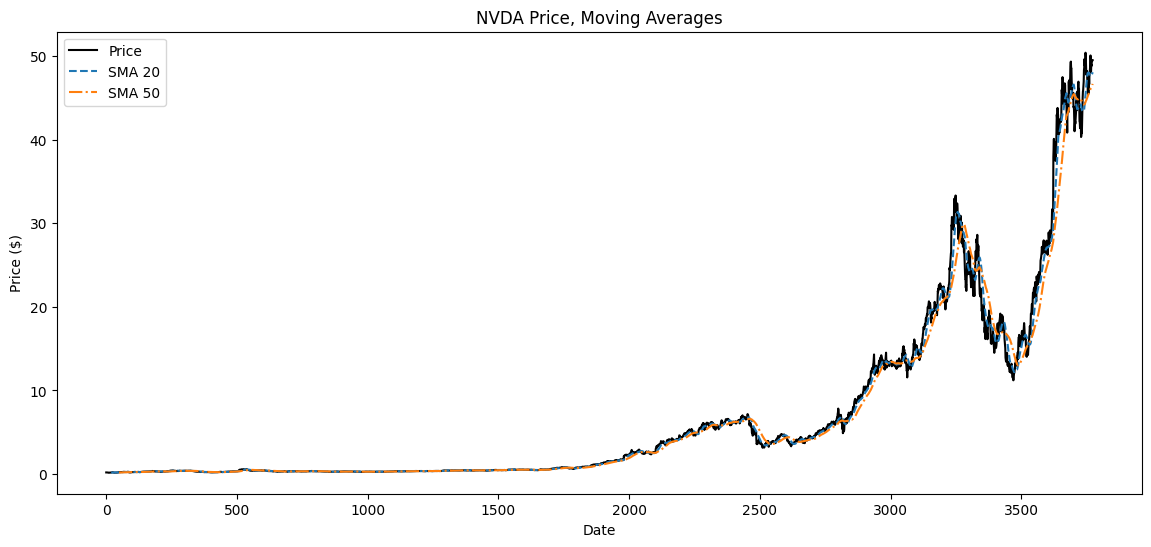

In [8]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(df.index, price, label="Price", color="black")
ax.plot(df.index, df["SMA_20"], label="SMA 20", linestyle="--")
ax.plot(df.index, df["SMA_50"], label="SMA 50", linestyle="-.")
ax.set_title("NVDA Price, Moving Averages")
ax.set_xlabel("Date")
ax.set_ylabel("Price ($)")
ax.legend()
plt.show()

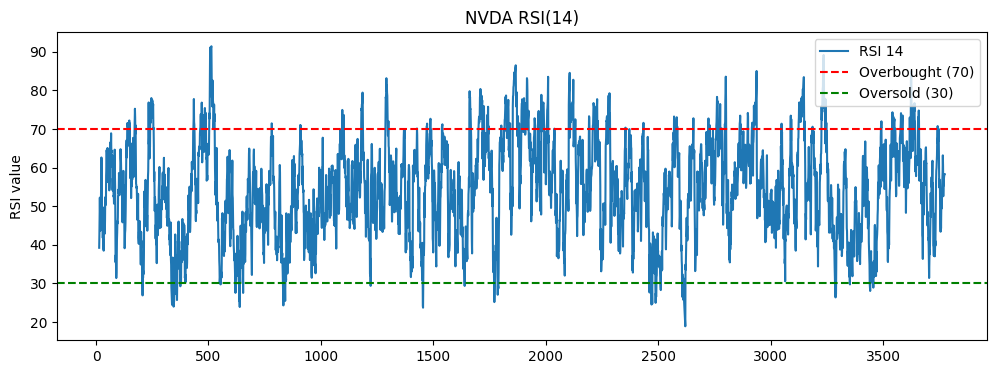

In [9]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(df.index, df["RSI_14"], label="RSI 14")
ax.axhline(70, color="red", linestyle="--", label="Overbought (70)")
ax.axhline(30, color="green", linestyle="--", label="Oversold (30)")
ax.set_title("NVDA RSI(14)")
ax.set_ylabel("RSI value")
ax.legend()
plt.show()

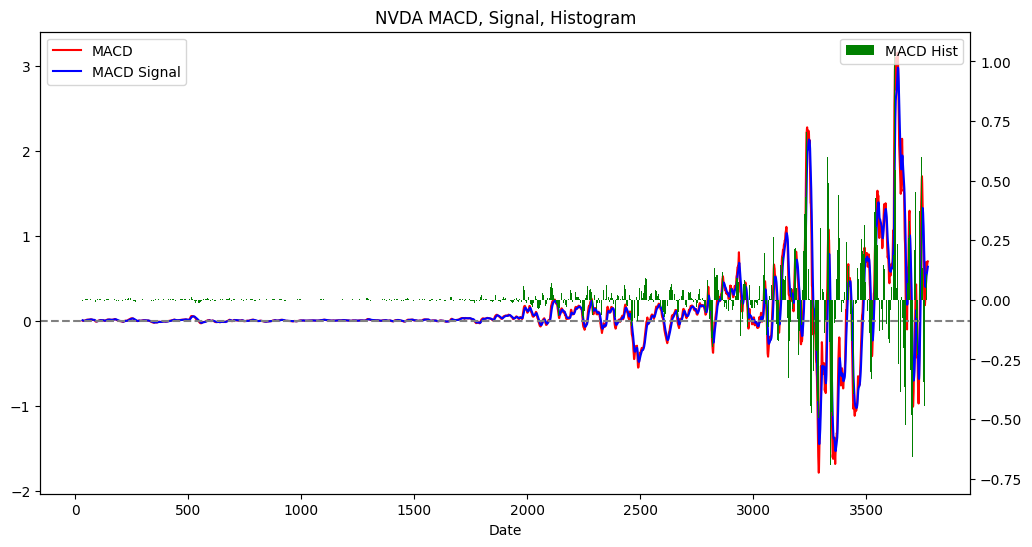

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df.index, df["MACD"], label="MACD", color="red")
ax.plot(df.index, df["MACD_signal"], label="MACD Signal", color="blue")
ax.axhline(0, color="grey", linestyle="--")
ax2 = ax.twinx()
ax2.bar(df.index, df["MACD_hist"], label="MACD Hist", color="green")

ax.set_title("NVDA MACD, Signal, Histogram")
ax.set_xlabel("Date")
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()